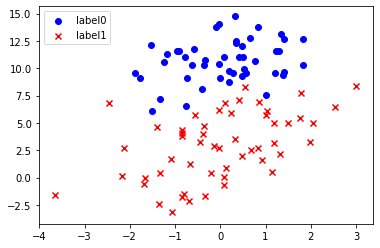

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
scale = False
# 加载数据
data = open(r"F:\0_个人学习\3_数据分析与挖掘\4_机器学习\1_逻辑回归\logistic.txt").readlines()
x = []
y = []
for i in data:
    x_da = i.strip().split('\t')
    x.append([float(x_da[0]),float(x_da[1])])
    y.append(int(x_da[2]))
# 绘制特征散点分布图
def plot_data(x):
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    for i in range(len(x)):
        if int(y[i]) == 0:
            x0.append(x[i][0])
            y0.append(x[i][1])
        else:
            x1.append(x[i][0])
            y1.append(x[i][1])
        # 画图
    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
plot_data(x)
plt.show()

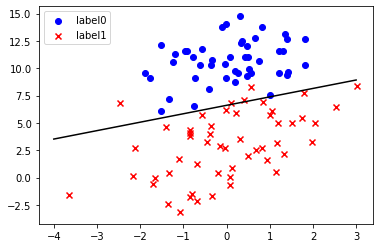

In [11]:
model = LogisticRegression(solver='liblinear',max_iter=5000)
model.fit(x,np.array(y))
model_cv = LogisticRegressionCV()
model_cv.fit(x,np.array(y))
plot_data(x)
x_test = np.array([[-4],[3]])
y_test = (-model.intercept_ - x_test*model.coef_[0][0])/model.coef_[0][1]
plt.plot(x_test, y_test, 'k')
plt.show()

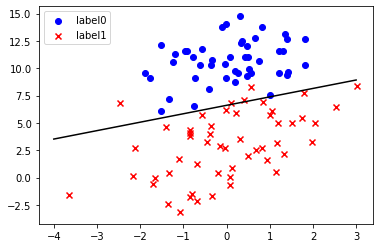

In [12]:
if scale == False:
    # 画图决策边界
    plot_data(x)
    x_test = np.array([[-4],[3]])
    y_test = (-model.intercept_ - x_test*model.coef_[0][0])/model.coef_[0][1]
    plt.plot(x_test, y_test, 'k')
    plt.show()

In [8]:
predictions = model.predict(x)

print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        47
           1       1.00      0.92      0.96        53

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [9]:
# 查看正确率
model.score(x,y)

0.96